### exp3. 프로젝트: 고양이 수염 스티커 만들기
커널정보 = base(python 3.9.7)

#### 0. 루브릭
***

|**평가문항**|**상세기준**|
|------------|-------------|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.|원본에 스티커 사진이 정상적으로 합성되었다.|
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.|정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.|
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|

#### 1. 필요한 모듈 import
***


In [58]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import dlib

print("done")

done


#### 2. 얼굴 검출 & 랜드마크 검출
***
dlib을 이용해 얼굴의 bounding box 위치와 landmark 위치 찾기

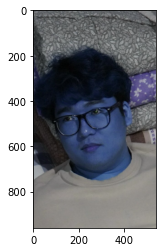

In [59]:
my_image_path = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

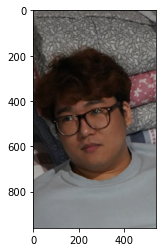

In [60]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [61]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

print("done")

done


rectangles[[(63, 348) (384, 669)]]


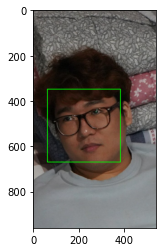

In [62]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [63]:
model_path = 'C:/project/aiffel_exp/exp3_cat sticker_project/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("done")

done


In [64]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


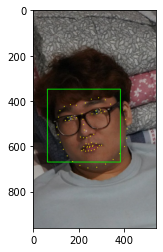

In [65]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 3. 스티커 적용 위치 확인하기
***
스티커가 적용 될 위치를 landmark를 사용하여 계산하기

In [66]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(236, 562)
(x,y) : (236,401)
(w,h) : (322,322)


(322, 322, 3)


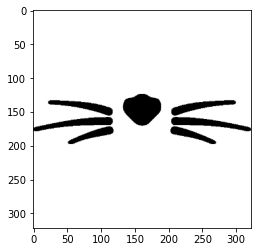

In [67]:
sticker_path = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

plt.imshow(img_sticker)
plt.show
print (img_sticker.shape)

In [68]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (75,401)


In [69]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (75,401)


#### 4. 스티커 적용하기
***
np.where를 이용해 스티커 적용하기  
스티커 뒤로 원본 이미지가 같이 보이도록 만들기

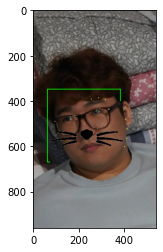

In [70]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[0]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
model_path = 'C:/project/aiffel_exp/exp3_cat sticker_project/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("done")

done


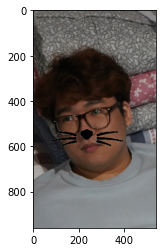

In [72]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[0]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[0]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 5. 고려사항들
* 조명이 어두운 사진 : 사진의 조도 및 얼굴의 명암이 이목구비 인식이 어려울 정도가 아니라면 정상적으로 작동하는 것 같다.
* 얼굴 각도가 이상한 사진 : 얼굴 인식 범위가 정면을 기준으로 생각보다 좁아 보였다. 눈을 감거나, 눈이 한쪽만 나오거나, 누워있거나 하는 경우 인식하지 못했다.
* 촬영거리가 먼 사진 : 촬영거리가 멀어도 얼굴이 정면이라면 잘 인식했다.
* 마스크를 끼고 있는 사진 : 마스크를 착용해서 코와 입이 가려지면 인식에 어려움이 있는 듯 하다. 그런데 마스크를 착용해도 얼굴을 인식하는 경우가 있었다.
* 사람과 비슷한 인형 사진 : 아주 잘 인식했다.

In [73]:
image2 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image2.png'
image3 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image3.png'
image4 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image4.png'
image5 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image5.png'
image6 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image6.png'
image7 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image7.png'
image8 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image8.png'
image9 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image9.png'
image10 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image10.png'
image11 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image11.png'
image12 = 'C:/project/aiffel_exp/exp3_cat sticker_project/images/image12.png'

def load_image(my_image_path):
    img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

    print(dlib_rects)   

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

rectangles[[(740, 313) (1061, 634)]]


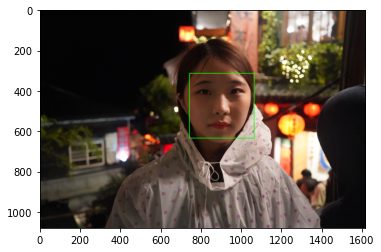

rectangles[]


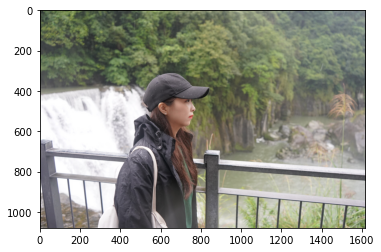

rectangles[]


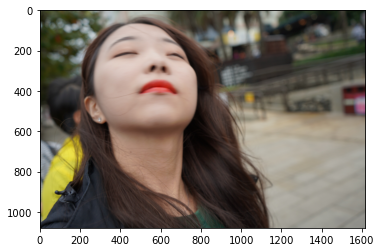

rectangles[[(3304, 295) (3412, 402)]]


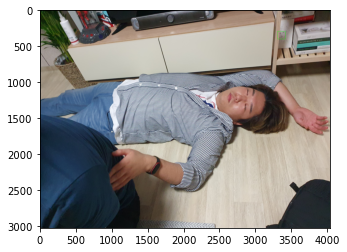

rectangles[]


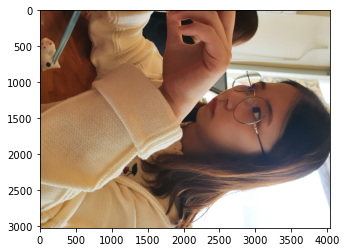

rectangles[[(706, 647) (973, 914)]]


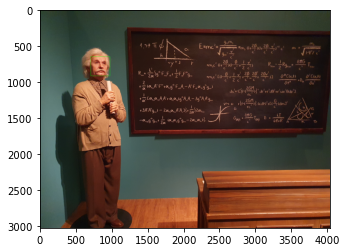

rectangles[[(2805, 1257) (2934, 1386)], [(970, 1243) (1099, 1372)]]


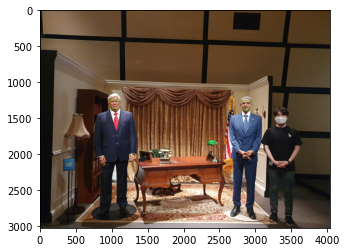

rectangles[[(1776, 1033) (2043, 1301)], [(1122, 1479) (1389, 1746)]]


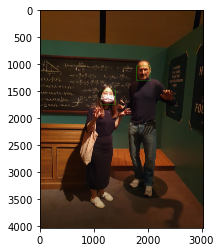

rectangles[]


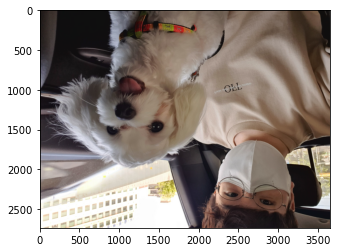

rectangles[[(626, 426) (688, 488)]]


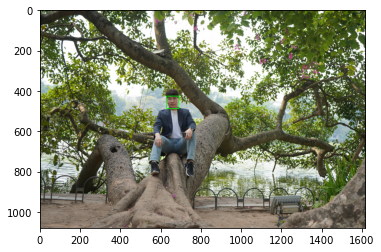

In [74]:
load_image(image2)
load_image(image3)
load_image(image4)
load_image(image5)
load_image(image6)
load_image(image7)
load_image(image9)
load_image(image10)
load_image(image11)
load_image(image12)

#### 6. 느낀점



* 카메라 앱에서 얼굴 인식이 어떤 원리로 동작하는지 알게 되어 유익했고, 직접 해보면서 모델과 이미지를 불러오고 처리하는 과정들을 어렴풋이나마 이해할 수 있어 좋았다.
* 스티커 이미지의 좌표를 지정하는 과정에서 제법 애를 먹었다. 해당 부분에 대한 이해가 부족하다는 반증으로 확실한 이해가 필요해 보인다.
* 이미지에서 얼굴을 인식하는 범위가 생각보다 좁았다. 모델의 한계인지 내 이해도의 부족인지 궁금했지만 확인하기가 어려웠다.
* 이번 프로젝트를 진행하면서 실제 카메라 스티커 앱인 SNOW를 다운받아 이미지 인식 범위와 속도를 확인해봤는데, 인식 범위의 폭이 굉장히 넓고 인식속도 또한 실시간으로 느껴졌다. 상용화되고 있는 머신러닝 기술의 뛰어남을 느꼈다.